In [ ]:
import pandas as pd
from faker import Faker

In [ ]:
fake = Faker('ko_kr') # 페이커 객체

In [ ]:
# CSV 파일 : Comma Separate Value
# 엑셀에서 볼 수 있는 텍스트 형식
# 콤마를 구분자로 하여 데이터를 표현해주는 파일

In [ ]:
csvList = [] # csv 파일로 저장할 리스트 데이터
columns01 = ['아이디','이름','주소','전화번호','이메일'] # 컬럼 이름
myencoding = 'UTF-8' # 'CP949' 'UTF-8' 인코딩 문자열

In [ ]:
for idx in range(10):
    onerow = [] # csv에 저장할 데이터 한건
    onerow.append(fake.user_name())
    onerow.append(fake.name())
    onerow.append(fake.address())
    onerow.append(fake.phone_number())
    onerow.append(fake.email())

    csvList.append(onerow)
# end for

In [ ]:
myframe01 = pd.DataFrame(csvList, columns= columns01)
myframe01

In [125]:
dataIn = './../dataIn/' # 읽어 들일 파일이 저장되어 있는 폴더(디렉토리)
dataOut = './../dataOut/' # 결과 값을 저장할 폴더(디렉토리)

In [ ]:
filename = dataIn + 'result01.csv'
myframe01.to_csv(filename, encoding= myencoding, index= False, mode= 'w')

In [ ]:
yourframe = pd.read_csv(filename, encoding = myencoding)
print(type(yourframe))
yourframe

In [129]:
filename = dataIn + 'payment01.csv'
payment = pd.read_csv(filename, encoding= 'CP949')
print('데이터 프레임 확인')
payment

데이터 프레임 확인


,사원명,출장지역,출장기간,부서,성별,교통비,식비
0,강미림,서울,3.0,영업부,남자,1000.0,500
1,장도윤,서울,NaN,총무부,남자,2000.0,300
2,김상민,부산,7.0,전산부,남자,3000.0,600
3,신승현,부산,5.0,영업부,여자,NaN,200
4,선우재민,서울,6.0,총무부,여자,4000.0,800


In [123]:
print('행 색인 정보 확인')
print(payment.index)

행 색인 정보 확인
RangeIndex(start=0, stop=5, step=1)


In [124]:
print('열 색인 정보 확인')
print(payment.columns)

열 색인 정보 확인
Index(['사원명', '출장지역', '출장기간', '부서', '성별', '교통비', '식비'], dtype='object')


In [127]:
business = payment['출장지역']
business

0    서울
1    서울
2    부산
3    부산
4    서울
Name: 출장지역, dtype: object

In [128]:
print('출장 지역 빈도수 확인')
business.value_counts()

출장 지역 빈도수 확인


출장지역
서울    3
부산    2
Name: count, dtype: int64

In [131]:
paytravel = payment['교통비']
type(paytravel)

pandas.core.series.Series

In [133]:
print(f'시리즈 요소 갯수 확인 : {paytravel.size}')
print(f'형상 확인 : {paytravel.shape}')
print(f'전체 요소 갯수 : {len(paytravel)}')
print(f'카운트(결측지(빠진 데이터) 제외) : {paytravel.count()}')
print(f'시리즈 타입 확인 : {paytravel.dtype}')
print(f'누락된 데이터 확인 : {paytravel.hasnans}')
print(f'unique 항목 확인 : {paytravel.is_unique}')

시리즈 요소 갯수 확인 : 5
형상 확인 : (5,)
전체 요소 갯수 : 5
카운트(결측지 제외) : 4
시리즈 타입 확인 : float64
누락된 데이터 확인 : True
unique 항목 확인 : True


In [134]:
business = payment['출장기간']
business

0    3.0
1    NaN
2    7.0
3    5.0
4    6.0
Name: 출장기간, dtype: float64

In [136]:
print(f'사분위수 : {business.quantile()}')
print(f'최소값 : {business.min()}')
print(f'최대값 : {business.max()}')
print(f'평균 : {business.mean()}')
print(f'중앙값 : {business.median()}')
print(f'표준 편차 : {business.std()}')
print(f'총합 : {business.sum()}')


사분위수 : 5.5
최소값 : 3.0
최대값 : 7.0
평균 : 5.25
중앙값 : 5.5
표준 편차 : 1.707825127659933
총합 : 21.0


In [137]:
payment

,사원명,출장지역,출장기간,부서,성별,교통비,식비
0,강미림,서울,3.0,영업부,남자,1000.0,500
1,장도윤,서울,NaN,총무부,남자,2000.0,300
2,김상민,부산,7.0,전산부,남자,3000.0,600
3,신승현,부산,5.0,영업부,여자,NaN,200
4,선우재민,서울,6.0,총무부,여자,4000.0,800


In [138]:
# '사원명' 컬럼을 행 색인으로 옮기기
payment = payment.set_index('사원명')
payment

,출장지역,출장기간,부서,성별,교통비,식비
사원명,,,,,,
강미림,서울,3.0,영업부,남자,1000.0,500
장도윤,서울,NaN,총무부,남자,2000.0,300
김상민,부산,7.0,전산부,남자,3000.0,600
신승현,부산,5.0,영업부,여자,NaN,200
선우재민,서울,6.0,총무부,여자,4000.0,800


In [142]:
renamed_col = {'출장지역':'다녀온 곳','식비':'밥값'}
renamed_row = {'장도윤':'장태경','선우재민':'선우은경'}

In [143]:
# 사전을 사용해 행이나 열 이름을 재설정 합니다. {목표 열 : 바뀔 이름}
payment = payment.rename(columns=renamed_col, index=renamed_row)
payment

,다녀온 곳,출장기간,부서,성별,교통비,밥값
사원명,,,,,,
강미림,서울,3.0,영업부,남자,1000.0,500
장태경,서울,NaN,총무부,남자,2000.0,300
김상민,부산,7.0,전산부,남자,3000.0,600
신승현,부산,5.0,영업부,여자,NaN,200
선우은경,서울,6.0,총무부,여자,4000.0,800


In [145]:
filename = dataIn + 'payment01.csv'
payment = pd.read_csv(filename, encoding= 'CP949', index_col= '사원명')
payment

,출장지역,출장기간,부서,성별,교통비,식비
사원명,,,,,,
강미림,서울,3.0,영업부,남자,1000.0,500
장도윤,서울,NaN,총무부,남자,2000.0,300
김상민,부산,7.0,전산부,남자,3000.0,600
신승현,부산,5.0,영업부,여자,NaN,200
선우재민,서울,6.0,총무부,여자,4000.0,800


In [147]:
payment['차량 지원'] = '지원'
payment

,출장지역,출장기간,부서,성별,교통비,식비,차량 지원
사원명,,,,,,,
강미림,서울,3.0,영업부,남자,1000.0,500,지원
장도윤,서울,NaN,총무부,남자,2000.0,300,지원
김상민,부산,7.0,전산부,남자,3000.0,600,지원
신승현,부산,5.0,영업부,여자,NaN,200,지원
선우재민,서울,6.0,총무부,여자,4000.0,800,지원


In [149]:
payment['최종 식비'] = payment['식비'] + 100
payment

,출장지역,출장기간,부서,성별,교통비,식비,차량 지원,최종 식비
사원명,,,,,,,,
강미림,서울,3.0,영업부,남자,1000.0,500,지원,600
장도윤,서울,NaN,총무부,남자,2000.0,300,지원,400
김상민,부산,7.0,전산부,남자,3000.0,600,지원,700
신승현,부산,5.0,영업부,여자,NaN,200,지원,300
선우재민,서울,6.0,총무부,여자,4000.0,800,지원,900


In [155]:
result = payment.drop('신승현', axis='index')
result

,출장지역,출장기간,부서,성별,교통비,식비,차량 지원,최종 식비
사원명,,,,,,,,
강미림,서울,3.0,영업부,남자,1000.0,500,지원,600
장도윤,서울,NaN,총무부,남자,2000.0,300,지원,400
김상민,부산,7.0,전산부,남자,3000.0,600,지원,700
선우재민,서울,6.0,총무부,여자,4000.0,800,지원,900


In [152]:
result = payment.drop(['장도윤','선우재민'], axis='index')
result

,출장지역,출장기간,부서,성별,교통비,식비,차량 지원,최종 식비
사원명,,,,,,,,
강미림,서울,3.0,영업부,남자,1000.0,500,지원,600
김상민,부산,7.0,전산부,남자,3000.0,600,지원,700
신승현,부산,5.0,영업부,여자,NaN,200,지원,300


In [153]:
result = payment.drop('출장기간', axis='columns')
result

,출장지역,부서,성별,교통비,식비,차량 지원,최종 식비
사원명,,,,,,,
강미림,서울,영업부,남자,1000.0,500,지원,600
장도윤,서울,총무부,남자,2000.0,300,지원,400
김상민,부산,전산부,남자,3000.0,600,지원,700
신승현,부산,영업부,여자,NaN,200,지원,300
선우재민,서울,총무부,여자,4000.0,800,지원,900


In [154]:
result
result = payment.drop(['차량 지원','부서'], axis='columns')
result

,출장지역,출장기간,성별,교통비,식비,최종 식비
사원명,,,,,,
강미림,서울,3.0,남자,1000.0,500,600
장도윤,서울,NaN,남자,2000.0,300,400
김상민,부산,7.0,남자,3000.0,600,700
신승현,부산,5.0,여자,NaN,200,300
선우재민,서울,6.0,여자,4000.0,800,900


In [157]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')

In [158]:
chartdata01 = payment['식비']
chartdata01

사원명
강미림     500
장도윤     300
김상민     600
신승현     200
선우재민    800
Name: 식비, dtype: int64

Text(0.5, 1.0, '식비 지급율')

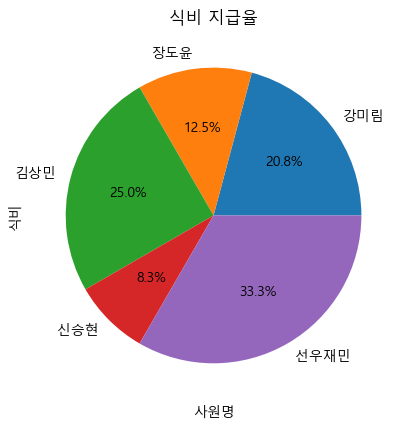

In [163]:
chartdata01.plot(kind = 'pie', explode=(0,0,0,0,0), autopct='%1.1f%%')
plt.xlabel(chartdata01.index.name)
plt.title(f'{chartdata01.name} 지급율')